In [1]:
# import scipy to read .mat file
from scipy.io import loadmat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# fmin_cg
from scipy.optimize import fmin_cg

%matplotlib inline

In [2]:
loc = '/Users/Chenyu/Documents/Coursera/Machine Learning/hw3/machine-learning-ex3/ex3/ex3data1.mat'
mat = loadmat(loc)

In [3]:
data_x = pd.DataFrame(mat['X'])
data_y = pd.DataFrame(mat['y'])
data = pd.concat([data_x, data_y], axis = 1)
data.shape

(5000, 401)

In [5]:
def dispData(data, row, col):
    mat = np.array(data).reshape((row, col)).T
    imgplt = plt.imshow(mat, cmap='gray')
    return imgplt

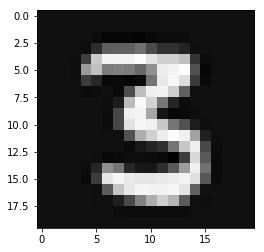

In [6]:
dispData(data_x.iloc[1980, :], 20, 20)

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmd = np.vectorize(sigmoid)

In [57]:
# vectorized cost function
def costFunc_reg(theta, x, y, l):
    m = len(y)
    theta = np.array(theta)
    y = np.array(y)
    hx = sigmd(x.dot(theta.T))
    
    if (hx.all() != 0) and ((1 - hx).all() != 0):
        
        j = (- y.T * np.log(hx) - (1. - y.T) * np.log(1 - hx)).sum() / m + l * (theta ** 2).sum() / 2. / m
    
    
    else: j = 100000
    
    #j = np.array(j)
    
    return j

In [48]:
test = np.array([1, 2, 3, 4])
test2 = (test / 2.).flatten()
test3 = test2 + test
test3[0] = 555
test3

array([ 555. ,    3. ,    4.5,    6. ])

In [56]:
test = np.array([1, 2, 3, 4])
test_2 = test ** 2
test_2.sum()

30

In [103]:
#############################################################
## It's important to keep the grad and theta as the 1d array
## when doing the calculations
#############################################################


def grad_reg(theta, x, y, l):
    m = len(y)
    theta = np.array(theta)
    y = np.array(y)
    hx = sigmd(np.dot(x, theta.T))
    
    loss = hx - y.T
    #print ("loss shape: ", np.shape(loss))
    grad = (np.dot(loss, x) / m).flatten()
    #print ("grad shape: ", np.shape(grad))
    #print ("theta shape: ", np.shape(theta))
    reg = [elem * l * 1. / m for elem in theta]
    #print ("reg shape: ", np.shape(reg))
    grad += reg
    
    #grad = np.dot(hx - y.T, x) / m + theta * l / m
    #print ("grad shape: ", np.shape(grad))

    grad[0] = ((hx[0] - y[0]) * x.iloc[0, :]).sum() / m
    
    return grad

In [104]:
# test scipy.optimize.fmin_cg
l = 1
x0 = [1] * data_x.shape[0]
df0 = pd.DataFrame(x0)
testx = pd.concat([df0, data_x], axis = 1)
#testx
testy = (data_y == 1).astype(int)
theta0 = [0] * testx.shape[1]
myarg = (testx, testy, l)


#cf = costFunc_reg(theta0, testx, testy, l)
#cf
#grad = grad_reg(theta0, testx, testy, l)
#np.shape(grad)

#theta_test = fmin_cg(costFunc_reg, theta0, args = myarg, fprime = grad_reg)
#theta_test

(401,)

In [105]:
#theta_test = fmin_cg(costFunc_reg, theta0, args = myarg, fprime = grad_reg, disp = 1, retall = 1)
theta_test = fmin_cg(costFunc_reg, theta0, args = myarg, fprime = grad_reg)

Optimization terminated successfully.
         Current function value: 0.027971
         Iterations: 59
         Function evaluations: 209
         Gradient evaluations: 209


In [66]:
np.shape(theta_test)

(401,)

In [88]:
# one-vs-all classification
def oneVsAll(x, y, num_labels, l):
    
    # add x0=1 to x
    x0 = [1] * x.shape[0]
    df0 = pd.DataFrame(x0)
    x = pd.concat([df0, x], axis = 1)
    
    # apply one-vs-all algorithm
    m, n = x.shape
    theta0 = np.zeros(n)
    theta = np.zeros(shape = (num_labels, n))
    for k in range(num_labels):
        if k == 0:
            label = (y == 10).astype(int)
        else:
            label = (y == k).astype(int)
        train = fmin_cg(costFunc_reg, theta0, args = (x, label, l), fprime = grad_reg)
        theta[k] = train
    return theta

In [130]:
theta_opt = oneVsAll(data_x, data_y, 10, 1.5)
theta_opt.shape

         Current function value: 0.029663
         Iterations: 46
         Function evaluations: 302
         Gradient evaluations: 290
Optimization terminated successfully.
         Current function value: 0.030879
         Iterations: 55
         Function evaluations: 185
         Gradient evaluations: 185
         Current function value: 0.076552
         Iterations: 144
         Function evaluations: 447
         Gradient evaluations: 436
Optimization terminated successfully.
         Current function value: 0.086334
         Iterations: 83
         Function evaluations: 230
         Gradient evaluations: 230
Optimization terminated successfully.
         Current function value: 0.057866
         Iterations: 70
         Function evaluations: 213
         Gradient evaluations: 213
         Current function value: 0.082335
         Iterations: 80
         Function evaluations: 332
         Gradient evaluations: 321
Optimization terminated successfully.
         Current function value

(10, 401)

In [107]:
theta_opt

array([[  2.23050503e-01,   0.00000000e+00,   0.00000000e+00, ...,
         -1.68445519e-04,   8.15224267e-06,   0.00000000e+00],
       [ -8.37321385e-03,   0.00000000e+00,   0.00000000e+00, ...,
          1.26937744e-03,   7.25984536e-09,   0.00000000e+00],
       [ -2.83097942e-01,   0.00000000e+00,   0.00000000e+00, ...,
          3.35400903e-03,  -3.83779462e-04,   0.00000000e+00],
       ..., 
       [ -3.95275388e-02,   0.00000000e+00,   0.00000000e+00, ...,
         -6.95433345e-04,   8.32631102e-05,   0.00000000e+00],
       [ -3.92171739e-03,   0.00000000e+00,   0.00000000e+00, ...,
         -1.23820650e-06,   1.27805514e-07,   0.00000000e+00],
       [ -5.77760228e-01,   0.00000000e+00,   0.00000000e+00, ...,
         -4.08352655e-03,   3.26859522e-04,   0.00000000e+00]])

In [120]:
def predOneVsAll(x, theta):
    x0 = [1] * x.shape[0]
    df0 = pd.DataFrame(x0)
    x = pd.concat([df0, x], axis = 1)
    
    hx = sigmd(x.dot(theta.T))
    
    pred = np.argmax(hx, axis = 1)
    
    pred[pred == 0] = 10
    
    return pred

In [131]:
pred_test = predOneVsAll(data_x, theta_opt)

In [132]:
pred_test = pd.DataFrame(pred_test)
pred_test.head()

,0
0,10
1,10
2,10
3,10
4,10


In [124]:
def accuracy(y, pred):
    m = len(y)
    count = (y == pred).sum()
    accuracy = count / m
    return accuracy

In [133]:
accu = accuracy(data_y, pred_test)
accu

0    0.8642
dtype: float64